/home/istlf/SYNC/DTU/JAN26/non-linear-transducers-project/util.py:411: RuntimeWarning: divide by zero encountered in log10
  p_rms_dB = 20*np.log10(p_rms/(20e-6))


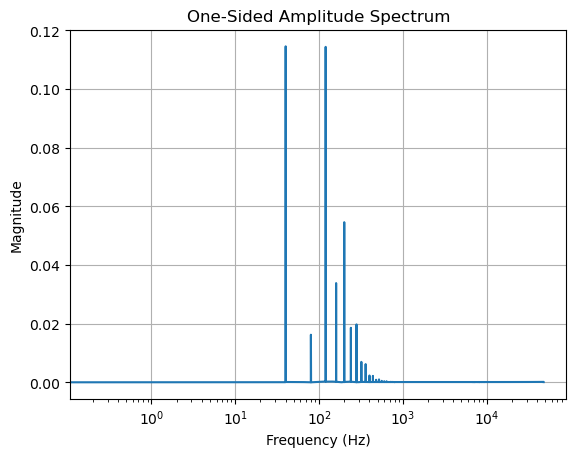

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import engutil 
import util

duration = 5.0
fs = 96000
#t_eval = np.linspace(0, duration, int(fs*duration))
#u = util.generate_pink_noise(len(t_eval), fs, fmin=1)


data = pd.read_csv("data/part2d_simulations/01_nonlinear_full_5sec_at_96000.0.csv")

#nonlinear_full = pd.read_csv("data/part2_simulations/02_nonlinear_stiffness_only.csv")

v = data["vel"]
X = np.array([i,d,v])

util.plot_spectrum_in_spl(v, fs, radius=4e-2)
val_thd, _ = util.thd_spl(v, fs, radius=4e-2)


# excite model b og c med pink noise for at lave transfer functions (alle non linearities)
# plot dem
# 
# b og c med et par nonlinearities og sammenlign oven i hinanden
# alt sammen ODE 45 
#  


len samples: 325690
nperseg = 21712.666666666668
len seconds: 5.0
Num avg: 30.000921149594696
freq res: 3.0000921149594695


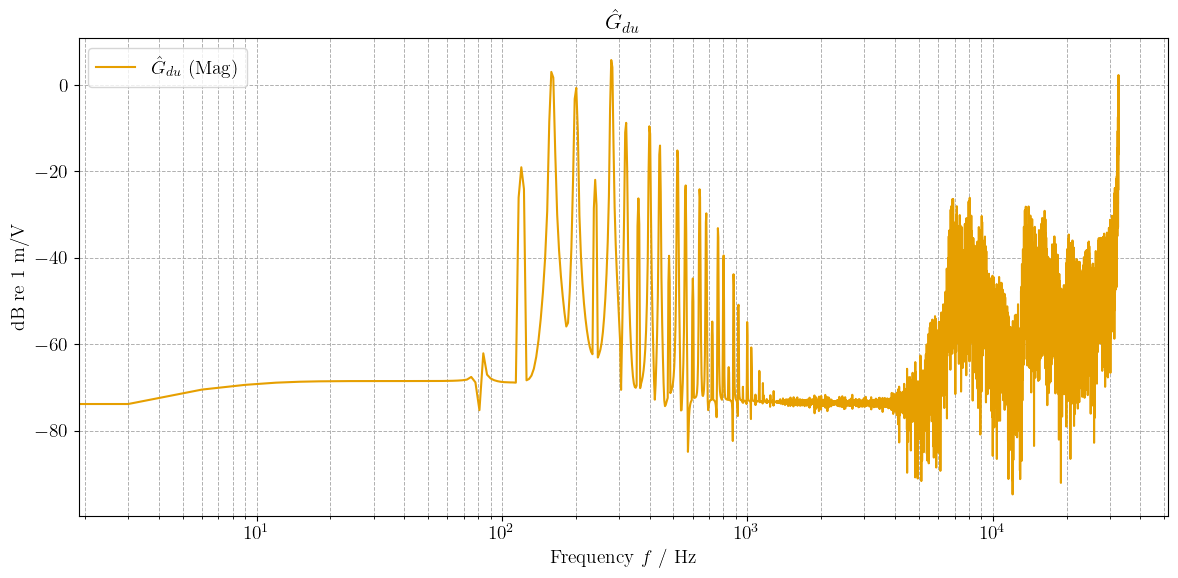

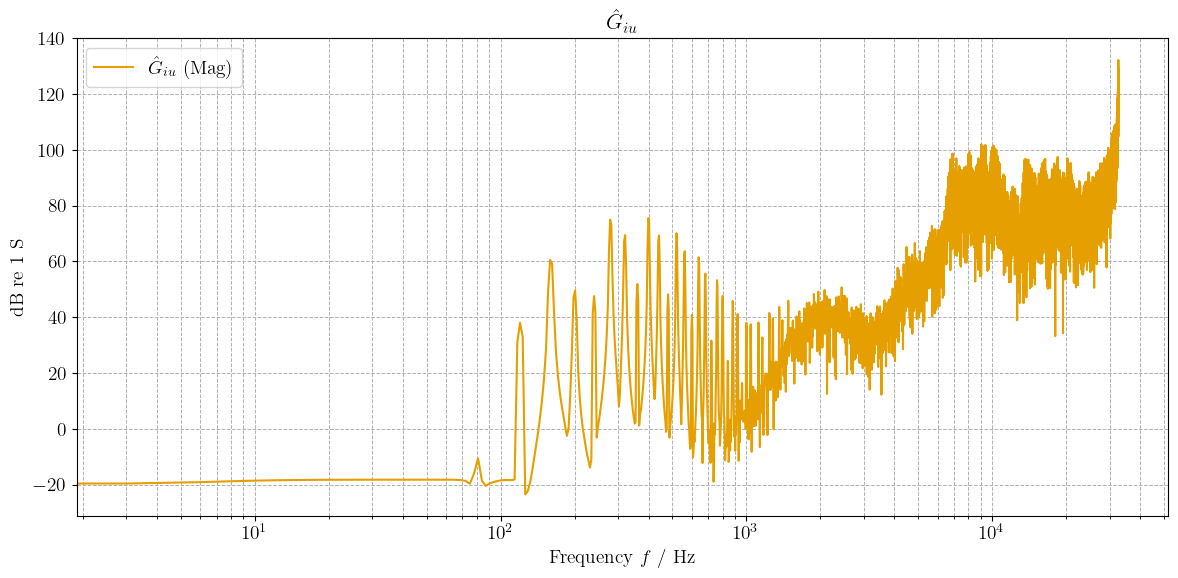

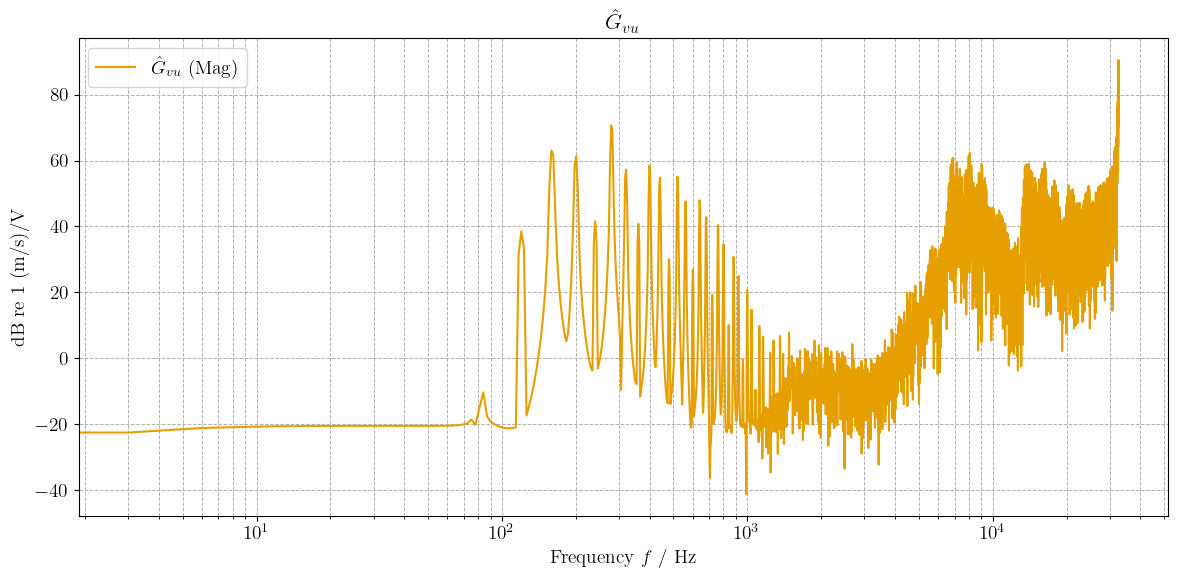

In [34]:

G_iu, G_du, G_vu, f = util.welchie(u, X, fs)
G_iu_mag_db, _, _ = engutil.tf_to_magphase(G_iu)
G_du_mag_db, _, _ = engutil.tf_to_magphase(G_du)
G_vu_mag_db, _, _ = engutil.tf_to_magphase(G_vu)


engutil.plot_bode(f, [(G_du_mag_db, None)], legends=["$\\hat{G}_{du}$"], title="$\\hat{G}_{du}$", ylabel_left="dB re 1 m/V")
engutil.plot_bode(f, [(G_iu_mag_db, None)], legends=["$\\hat{G}_{iu}$"], title="$\\hat{G}_{iu}$", ylabel_left="dB re 1 S")
engutil.plot_bode(f, [(G_vu_mag_db, None)], legends=["$\\hat{G}_{vu}$"], title="$\\hat{G}_{vu}$", ylabel_left="dB re 1 (m/s)/V")